In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn import preprocessing
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import re

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

                                               address          suburb  \
0                    121 Evan Street, PENRITH NSW 2750         PENRITH   
2    CALL BHARGAV BRAMALL AVENUE, MARSDEN PARK NSW ...    MARSDEN PARK   
3    5 BED + 3 BATH + MED SUNDEW PARADE, MARSDEN PA...    MARSDEN PARK   
4    5 BED + 3 BATH + MED SUNDEW PARADE, MARSDEN PA...    MARSDEN PARK   
5        Lot 4228 Farlow Parade, MARSDEN PARK NSW 2765    MARSDEN PARK   
..                                                 ...             ...   
396          14 Ann Minchin  Way, MINCHINBURY NSW 2770     MINCHINBURY   
398                   23 Hynds Road, BOX HILL NSW 2765        BOX HILL   
400                                RIVERSTONE NSW 2765      RIVERSTONE   
401                            JORDAN SPRINGS NSW 2747  JORDAN SPRINGS   
402  Lot 127 Kewney Street ( Proposed Address), BOX...        BOX HILL   

       price  beds  baths  parking  size  
0     729000     3    1.0        2  None  
2    1700000     8    6.0

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


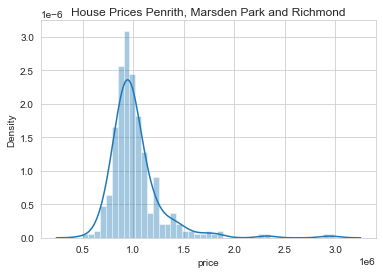

Mean house price:  1022138.8888888889
Median house price:  961865.0


C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


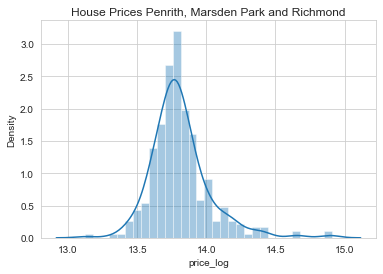

Empty DataFrame
Columns: [suburb, price, beds, baths, parking]
Index: []


In [64]:

def EncodePropertyType(df):
    try:
        df.propertyType = lePropertyType.fit_transform(df.propertyType)
    except:
        print('Error encoding')
    return df

leSuburb = preprocessing.LabelEncoder()

lePropertyType = preprocessing.LabelEncoder()

df = pd.read_json('relevantdata.json')
df = df[df.price > 300000]
df = df.mask(df.eq('None')).dropna()

# "address": "JORDAN SPRINGS NSW 2747",
# "price": 675000.0,
# "beds": "4",
# "baths": "2",
# "parking": "1",
#  "size": "192m² "

def convertsize(size):
    if "m²" in size:
        return float(re.search(r'\d+', size).group())
    elif "ha" in size:
        return 10000 * float(re.search(r'\d+', size).group())
    else:
        return None


modDfObj = df.apply(lambda x: convertsize(x) if x.name == 'size' else x)

print(modDfObj)


new = df.filter(['suburb','price','beds','baths', 'parking'])

counts = new['suburb'].value_counts()
#new = new.loc[new['suburb'].isin(counts.index[counts > 2])]
new = new.dropna()

y = new.filter(['price'], axis = 1)

X = new.drop('price', axis = 1)

price = df.price

#print(X)
print(df.sort_values(by=['price']))


sns.set_style('whitegrid')
plt.title("House Prices Penrith, Marsden Park and Richmond")
sns.distplot(price)
plt.show()


print("Mean house price: ", price.mean())
print("Median house price: ",price.median())

df['price_log'] = np.log(df.price)
price = df.price_log
sns.distplot(price)
plt.title("House Prices Penrith, Marsden Park and Richmond")
plt.show()


X['suburb'] = leSuburb.fit_transform(X['suburb'])
#X['propertyType'] = lePropertyType.fit_transform(X['propertyType'])


is_NaN = new.isnull()

row_has_NaN = is_NaN.any(axis=1)

rows_with_NaN = new[row_has_NaN]
print(rows_with_NaN)

In [56]:
skf = StratifiedKFold(n_splits=10)
dct_accu_stratified = []

decTree = RandomForestClassifier()

# print(X)
# print(y)

decTree.fit(X,y.values.ravel())
decTree.score(X,y.values.ravel())




# Print the output.
# print('List of possible accuracy:', dct_accu_stratified)
# print('\nMaximum Accuracy That can be obtained from this model is:', max(dct_accu_stratified)*100, '%')
# print('\nMinimum Accuracy:', min(dct_accu_stratified)*100, '%')
# print('\nOverall Accuracy:', mean(dct_accu_stratified)*100, '%')
# print('\nStandard Deviation is:', stdev(dct_accu_stratified))

0.6103896103896104

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 1  3  5  7  9 11 13 15 17] TEST: [ 0  2  4  6  8 10 12 14 16]
TRAIN: [ 0  2  4  6  8 10 12 14 16] TEST: [ 1  3  5  7  9 11 13 15 17]


C:\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
